In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/beer-servings.csv')
df.head()

,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,1,Albania,89.0,132.0,54.0,4.9,Europe
2,2,Algeria,25.0,0.0,14.0,0.7,Africa
3,3,Andorra,245.0,138.0,312.0,12.4,Europe
4,4,Angola,217.0,57.0,45.0,5.9,Africa


In [ ]:
df.drop('country',axis=1,inplace=True)

In [ ]:
df.head()

,Unnamed: 0,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0,0.0,0.0,0.0,0.0,Asia
1,1,89.0,132.0,54.0,4.9,Europe
2,2,25.0,0.0,14.0,0.7,Africa
3,3,245.0,138.0,312.0,12.4,Europe
4,4,217.0,57.0,45.0,5.9,Africa


In [ ]:
from sklearn.preprocessing import LabelEncoder
le_continent=LabelEncoder()

In [ ]:
df['continent_n']=le_continent.fit_transform(df['continent'])
df.head()

,Unnamed: 0,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,continent_n
0,0,0.0,0.0,0.0,0.0,Asia,1
1,1,89.0,132.0,54.0,4.9,Europe,2
2,2,25.0,0.0,14.0,0.7,Africa,0
3,3,245.0,138.0,312.0,12.4,Europe,2
4,4,217.0,57.0,45.0,5.9,Africa,0


In [ ]:
df.drop('continent',axis=1,inplace=True)

KeyError: ignored

In [ ]:
df.head()

,Unnamed: 0,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent_n
0,0,0.0,0.0,0.0,0.0,1
1,1,89.0,132.0,54.0,4.9,2
2,2,25.0,0.0,14.0,0.7,0
3,3,245.0,138.0,312.0,12.4,2
4,4,217.0,57.0,45.0,5.9,0


In [ ]:
df.isna().sum()

Unnamed: 0                      0
beer_servings                   8
spirit_servings                 8
wine_servings                   6
total_litres_of_pure_alcohol    1
continent_n                     0
dtype: int64

In [ ]:
df['beer_servings']=df['beer_servings'].fillna(df['beer_servings'].median())
df.isna().sum()

Unnamed: 0                      0
beer_servings                   0
spirit_servings                 8
wine_servings                   6
total_litres_of_pure_alcohol    1
continent_n                     0
dtype: int64

In [ ]:
for i in ['spirit_servings','wine_servings','total_litres_of_pure_alcohol']:
  df[i]=df[i].fillna(df[i].median())

In [ ]:
df.isna().sum()

Unnamed: 0                      0
beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
continent_n                     0
dtype: int64

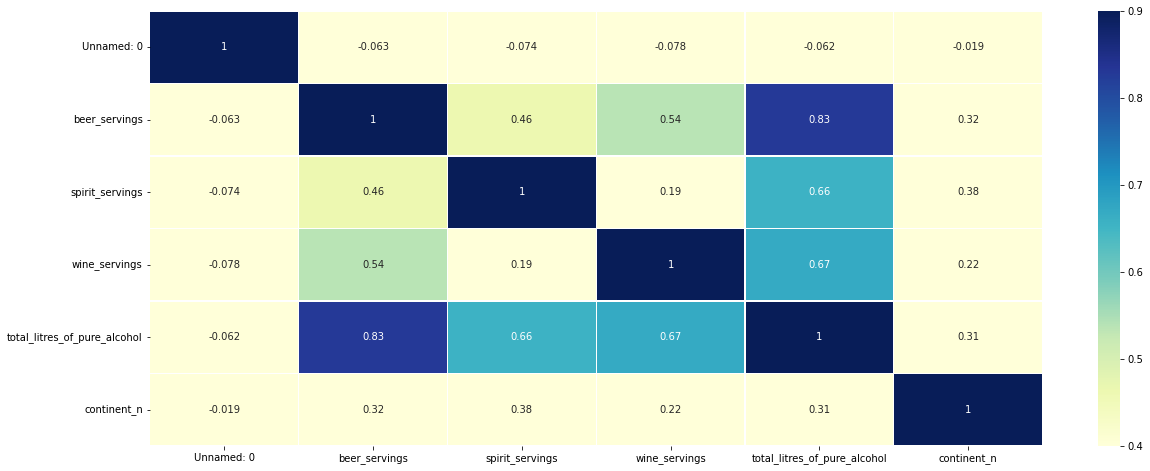

In [ ]:
corrmatrix=df.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,vmin=0.4,vmax=0.9,annot=True,linewidths=0.2,cmap='YlGnBu')

In [ ]:
df.columns
y=df['total_litres_of_pure_alcohol']
X=df.drop('total_litres_of_pure_alcohol',axis=1)


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)


In [ ]:
from sklearn import linear_model
lr=linear_model.LinearRegression()
model=lr.fit(X_train,y_train)
predictions=model.predict(X_test)
predictions

array([12.0713375 ,  1.7360848 ,  4.31742703,  9.78769859,  5.21843279,
        5.258597  ,  9.52829667,  1.76580841, 10.81138622, 10.01296775,
        0.94534257,  5.3242986 ,  1.74557876, 11.72515176,  2.46423052,
        2.78574412,  3.13136192,  2.57132921,  0.75747413, 11.28376915,
        1.15624791, 11.29807501,  1.5040589 , 11.66090006,  8.47741232,
        2.28461387,  1.3405301 ,  7.79878441,  9.12227809,  1.94065551,
        1.52676299,  1.9176231 ,  1.13631929,  0.8637067 ,  1.13421098,
        4.95556143, 10.84354733,  7.87922671, 10.50024771])